In [1]:
import pandas as pd
import numpy as np
import os
import json
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [2]:
df = pd.read_csv(r"D:\29 CS5228\03 Project\HDBResalePrice\outs\train_df_fe_all.csv")
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,...,monthly_PLR,monthly_SDR,monthly_CPI,median_resale_price,no_of_resale_applications,resale_transactions,HDB_Completed,HDB_Under Construction,DBSS_Completed,DBSS_Under Construction
0,2001-08,pasir ris,4 room,2,pasir ris drive 4,01 to 06,118.0,model a,uncategorized,1989,...,5.80,1.28,75.299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-10,punggol,5 room,0,punggol field,10 to 15,110.0,improved,uncategorized,2003,...,5.35,0.11,99.255,460900.0,1024.0,3822.0,4638.0,14394.0,0.0,0.0
2,2020-09,sengkang,5 room,2,fernvale lane,01 to 06,112.0,premium apartment,uncategorized,2004,...,5.25,0.10,100.139,475000.0,1954.0,NaN,NaN,NaN,NaN,NaN
3,2000-10,clementi,3 room,0,clementi avenue 4,06 to 10,67.0,new generation,uncategorized,1980,...,5.80,1.28,74.844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01,bukit batok,3 room,0,bukit batok street 11,06 to 10,73.0,model a,uncategorized,1985,...,5.38,0.11,98.121,339000.0,1362.0,5553.0,180.0,2886.0,0.0,0.0


In [3]:
json_path = r"D:\29 CS5228\03 Project\HDBResalePrice\src\utils\params.json"

with open(json_path) as json_file:
    params = json.load(json_file)
    
params['num_cols']

['block', 'flat_age', 'resale_year', 'floor_area_sqm', 'latitude', 'longitude']

In [4]:
dependent = 'resale_price'
nums = params['num_cols']+params['aux_cols']
cates = params['cate_cols']

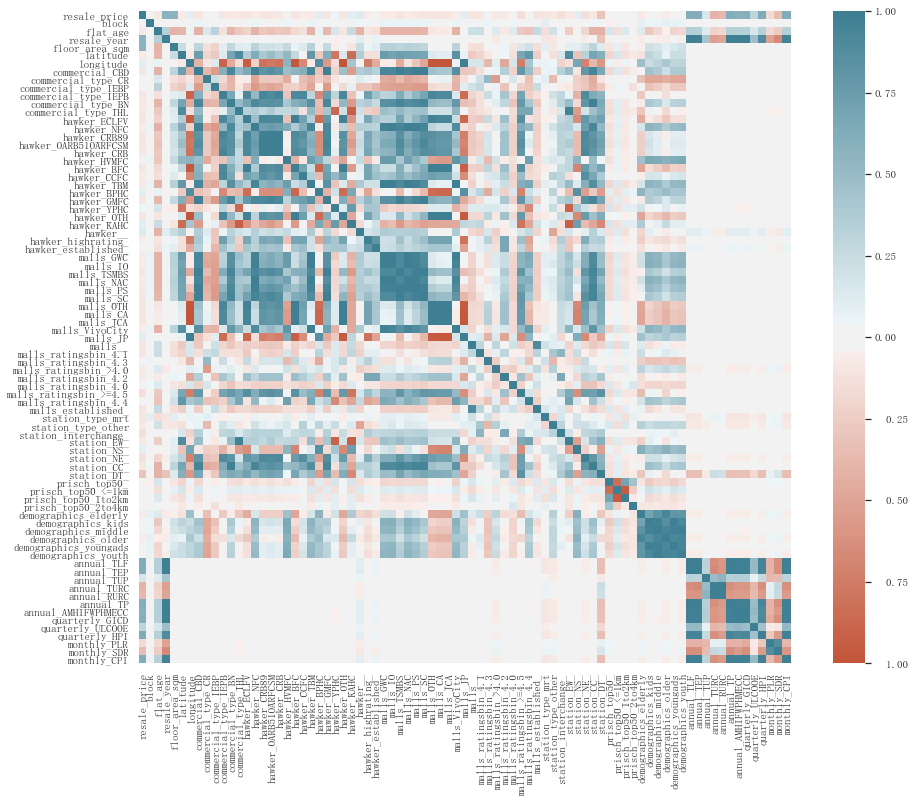

In [5]:
# correlation coefficients
corrs = df[[i for i in [dependent]+nums if i in df.columns]].corr('pearson')

# plot heatmap
sns.set(rc={'figure.figsize':(10*1.5,8*1.5)})
sns.set(font="SimSun")
    
ax = sns.heatmap(
    corrs, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, xticklabels=True, yticklabels=True)
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# );

In [5]:
# strings
for col in cates:
    df[col] = df[col].apply(lambda x: str(x).lower())
df_dummified = pd.get_dummies(df[cates], drop_first=True)
print(list(df_dummified.columns))
final_df = pd.concat([df[[dependent]+nums], df_dummified], axis=1)
final_df.head()

['flat_type_2 room', 'flat_type_3 room', 'flat_type_4 room', 'flat_type_5 room', 'flat_type_executive', 'flat_type_multi generation', 'street_name_admiralty link', 'street_name_ah hood road', 'street_name_aljunied crescent', 'street_name_aljunied road', 'street_name_anchorvale crescent', 'street_name_anchorvale drive', 'street_name_anchorvale lane', 'street_name_anchorvale link', 'street_name_anchorvale road', 'street_name_anchorvale street', 'street_name_ang mo kio avenue 1', 'street_name_ang mo kio avenue 10', 'street_name_ang mo kio avenue 2', 'street_name_ang mo kio avenue 3', 'street_name_ang mo kio avenue 4', 'street_name_ang mo kio avenue 5', 'street_name_ang mo kio avenue 6', 'street_name_ang mo kio avenue 8', 'street_name_ang mo kio avenue 9', 'street_name_ang mo kio street 11', 'street_name_ang mo kio street 21', 'street_name_ang mo kio street 31', 'street_name_ang mo kio street 32', 'street_name_ang mo kio street 52', 'street_name_ang mo kio street 61', 'street_name_bain str

,resale_price,block,flat_age,resale_year,floor_area_sqm,latitude,longitude,commercial_CBD,commercial_type_CR,commercial_type_IEBP,...,resale_month_11,resale_month_12,resale_month_2,resale_month_3,resale_month_4,resale_month_5,resale_month_6,resale_month_7,resale_month_8,resale_month_9
0,209700.0,2,12,2001,118.0,1.369008,103.958697,14.7553,2.3136,2.3742,...,0,0,0,0,0,0,0,0,1,0
1,402300.0,0,11,2014,110.0,1.399007,103.906991,13.7758,4.6135,1.4624,...,0,0,0,0,0,0,0,0,0,0
2,351000.0,2,16,2020,112.0,1.388348,103.873815,11.4968,2.4703,1.4449,...,0,0,0,0,0,0,0,0,0,1
3,151200.0,0,20,2000,67.0,1.318493,103.766702,10.3811,3.9762,2.3871,...,0,0,0,0,0,0,0,0,0,0
4,318600.0,0,28,2013,73.0,1.348149,103.742658,14.1860,1.8071,2.3115,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(list(final_df.columns))

['resale_price', 'block', 'flat_age', 'resale_year', 'floor_area_sqm', 'latitude', 'longitude', 'commercial_CBD', 'commercial_type_CR', 'commercial_type_IEBP', 'commercial_type_IEPB', 'commercial_type_BN', 'commercial_type_IHL', 'hawker_ECLFV', 'hawker_NFC', 'hawker_CRB89', 'hawker_OARB51OARFCSM', 'hawker_CRB', 'hawker_HVMFC', 'hawker_BFC', 'hawker_CCFC', 'hawker_TBM', 'hawker_BPHC', 'hawker_GMFC', 'hawker_YPHC', 'hawker_OTH', 'hawker_KAHC', 'hawker__', 'hawker_highrating_', 'hawker_established_', 'malls_GWC', 'malls_IO', 'malls_TSMBS', 'malls_NAC', 'malls_PS', 'malls_SC', 'malls_OTH', 'malls_CA', 'malls_JCA', 'malls_VivoCity', 'malls_JP', 'malls__', 'malls_ratingsbin_4.1', 'malls_ratingsbin_4.3', 'malls_ratingsbin_>4.0', 'malls_ratingsbin_4.2', 'malls_ratingsbin_4.0', 'malls_ratingsbin_>=4.5', 'malls_ratingsbin_4.4', 'malls_established_', 'station_type_mrt', 'station_type_other', 'station_interchange_', 'station_EW_', 'station_NS_', 'station_NE_', 'station_CC_', 'station_DT_', 'prisch

In [7]:
# annual_TEP (remove)
# annual_TURC
# annual_TP
# annual_AMD
# quarterly_HPI
# quarterly_GICD
# monthly_CPI
main_columns = [
    'block', 'flat_age', 'resale_year', 'floor_area_sqm', 'latitude', 'longitude', 'commercial_CBD', 
    'commercial_type_CR', 'commercial_type_IEBP', 'commercial_type_IEPB', 'commercial_type_BN', 'commercial_type_IHL',
    'hawker__', 'malls_ratingsbin_4.1', 'malls_ratingsbin_4.3', 'malls_ratingsbin_>4.0', 'malls_ratingsbin_4.2', 'malls_ratingsbin_4.0', 'malls_ratingsbin_>=4.5', 'malls_ratingsbin_4.4',
    'station_interchange_', 'station_EW_', 'station_NS_', 'station_NE_', 'station_CC_', 'station_DT_',
    'prisch_top50_', 'prisch_top50_<=1km', 'prisch_top50_1to2km', 'prisch_top50_2to4km', 'demographics_elderly', 
    'demographics_kids', 'demographics_middle', 'demographics_older', 'demographics_youngads', 'demographics_youth', 
    'annual_TLF', 'annual_TUP', 'annual_RURC', 'quarterly_ULCOOE','monthly_PLR', 'monthly_SDR',
    'flat_type_2 room', 'flat_type_3 room', 'flat_type_4 room', 'flat_type_5 room', 
    'flat_type_executive', 'flat_type_multi generation', 
    'storey_range_06 to 10', 'storey_range_10 to 15', 'storey_range_16 to 21', 'storey_range_21 to 25', 'storey_range_25 to 30', 'storey_range_31 to 36', 'storey_range_36 to 40', 'storey_range_40 to 45', 'storey_range_46 to 51', 'flat_model_adjoined flat', 'flat_model_apartment', 'flat_model_dbss', 'flat_model_improved', 'flat_model_improved maisonette', 'flat_model_maisonette', 'flat_model_model a', 'flat_model_model a maisonette', 'flat_model_model a2', 'flat_model_multi generation', 'flat_model_new generation', 'flat_model_premium apartment', 'flat_model_premium apartment loft', 'flat_model_premium maisonette', 'flat_model_simplified', 'flat_model_standard', 'flat_model_terrace', 'flat_model_type s1', 'flat_model_type s2', 'subzone_alexandra hill', 'subzone_aljunied', 'subzone_anak bukit', 'subzone_anchorvale', 'subzone_ang mo kio town centre', 'subzone_balestier', 'subzone_bangkit', 'subzone_bedok north', 'subzone_bedok reservoir', 'subzone_bedok south', 'subzone_bencoolen', 'subzone_bendemeer', 'subzone_bishan east', 'subzone_boon keng', 'subzone_boon lay place', 'subzone_boon teck', 'subzone_braddell', 'subzone_bugis', 'subzone_bukit batok central', 'subzone_bukit batok east', 'subzone_bukit batok south', 'subzone_bukit batok west', 'subzone_bukit ho swee', 'subzone_bukit merah', 'subzone_changi point', 'subzone_cheng san', 'subzone_china square', 'subzone_chinatown', 'subzone_choa chu kang central', 'subzone_choa chu kang north', 'subzone_chong boon', 'subzone_city hall', 'subzone_clementi central', 'subzone_clementi north', 'subzone_clementi west', 'subzone_clementi woods', 'subzone_commonwealth', 'subzone_compassvale', 'subzone_crawford', 'subzone_depot road', 'subzone_dover', 'subzone_everton park', 'subzone_fajar', 'subzone_farrer court', 'subzone_farrer park', 'subzone_fernvale', 'subzone_frankel', 'subzone_gali batu', 'subzone_geylang bahru', 'subzone_geylang east', 'subzone_ghim moh', 'subzone_gombak', 'subzone_guilin', 'subzone_henderson hill', 'subzone_holland drive', 'subzone_hong kah', 'subzone_hong kah north', 'subzone_hougang central', 'subzone_hougang east', 'subzone_hougang west', 'subzone_jelebu', 'subzone_joo seng', 'subzone_jurong west central', 'subzone_kaki bukit', 'subzone_kampong bugis', 'subzone_kampong java', 'subzone_kampong tiong bahru', 'subzone_kampong ubi', 'subzone_kangkar', 'subzone_keat hong', 'subzone_kebun bahru', 'subzone_kembangan', 'subzone_khatib', 'subzone_kim keat', 'subzone_kovan', 'subzone_lavender', 'subzone_leedon park', 'subzone_little india', 'subzone_lorong 8 toa payoh', 'subzone_lorong ah soo', 'subzone_lower seletar', 'subzone_macpherson', 'subzone_margaret drive', 'subzone_marine parade', 'subzone_marymount', 'subzone_matilda', 'subzone_mei chin', 'subzone_midview', 'subzone_moulmein', 'subzone_north coast', 'subzone_northland', 'subzone_pasir panjang 2', 'subzone_pasir ris central', 'subzone_pasir ris drive', 'subzone_pasir ris west', "subzone_pearl's hill", 'subzone_pei chun', 'subzone_peng siang', 'subzone_potong pasir', 'subzone_punggol field', 'subzone_punggol town centre', 'subzone_redhill', 'subzone_rivervale', 'subzone_saujana', 'subzone_sembawang central', 'subzone_sembawang north', 'subzone_sengkang town centre', 'subzone_senja', 'subzone_serangoon central', 'subzone_serangoon garden', 'subzone_serangoon north', 'subzone_shangri-la', 'subzone_simei', 'subzone_sungei road', 'subzone_sunset way', 'subzone_tai seng', 'subzone_taman jurong', 'subzone_tampines east', 'subzone_tampines west', 'subzone_tanglin halt', 'subzone_tanjong rhu', 'subzone_teban gardens', 'subzone_teck whye', 'subzone_telok blangah drive', 'subzone_telok blangah rise', 'subzone_telok blangah way', 'subzone_tiong bahru', 'subzone_tiong bahru station', 'subzone_toa payoh central', 'subzone_toa payoh west', 'subzone_toh guan', 'subzone_townsville', 'subzone_trafalgar', 'subzone_tyersall', 'subzone_ulu pandan', 'subzone_upper paya lebar', 'subzone_upper thomson', 'subzone_victoria', 'subzone_waterway east', 'subzone_wenya', 'subzone_woodgrove', 'subzone_woodlands east', 'subzone_woodlands south', 'subzone_woodlands west', 'subzone_yew tee', 'subzone_yio chu kang east', 'subzone_yio chu kang west', 'subzone_yishun central', 'subzone_yishun east', 'subzone_yishun south', 'subzone_yishun west', 'subzone_yuhua east', 'subzone_yuhua west', 'subzone_yunnan',
    'region_east region', 'region_north region', 'region_north-east region', 'region_west region', 'resale_quarter_2', 'resale_quarter_3', 'resale_quarter_4', 'resale_month_10', 'resale_month_11', 'resale_month_12', 'resale_month_2', 'resale_month_3', 'resale_month_4', 'resale_month_5', 'resale_month_6', 'resale_month_7', 'resale_month_8', 'resale_month_9'    
]

In [9]:
final_df['const'] = 1

reg1 = sm.OLS(final_df[dependent],final_df[['const']+main_columns]).fit(cov_type='HC1')

all_x_cols = ['const']+nums+list(df_dummified.columns)
reg2 = sm.OLS(final_df[dependent],final_df[all_x_cols]).fit(cov_type='HC1')

without_street_name = [i for i in all_x_cols if 'street_name' not in i]
reg3 = sm.OLS(final_df[dependent],final_df[without_street_name]).fit(cov_type='HC1')

without_ss = [i for i in without_street_name if 'subzone' not in i]
reg4 = sm.OLS(final_df[dependent],final_df[without_ss]).fit(cov_type='HC1')

without_aux_cols = [i for i in all_x_cols if i not in params['aux_cols']]
reg5 = sm.OLS(final_df[dependent],final_df[without_aux_cols]).fit(cov_type='HC1')

without_time_cols = [i for i in without_aux_cols if 'resale_' not in i]
reg6 = sm.OLS(final_df[dependent],final_df[without_time_cols]).fit(cov_type='HC1')

# reg6 = sm.OLS(df[dependent],df[['const']+B+H]).fit(cov_type='HC1')
# reg7 = sm.OLS(df[dependent],df[['const']+B+D]).fit(cov_type='HC1')
# reg8 = sm.OLS(df[dependent],df[['const']+B+T]).fit(cov_type='HC1')
# reg9 = sm.OLS(df[dependent],df[['const']+H+D]).fit(cov_type='HC1')
# reg10 = sm.OLS(df[dependent],df[['const']+H+T]).fit(cov_type='HC1')
# reg11 = sm.OLS(df[dependent],df[['const']+D+T]).fit(cov_type='HC1')

# reg12 = sm.OLS(df[dependent],df[['const']+B]).fit(cov_type='HC1')
# reg13 = sm.OLS(df[dependent],df[['const']+H]).fit(cov_type='HC1')
# reg14 = sm.OLS(df[dependent],df[['const']+D]).fit(cov_type='HC1')
# reg15 = sm.OLS(df[dependent],df[['const']+T]).fit(cov_type='HC1')

# , reg2, reg3, reg4, reg5, reg6, reg7, reg8, reg9, reg10, reg11, reg12, reg13, reg14, reg15
results_as_html = summary_col([reg1, reg2, reg3, reg4, reg5, reg6],stars=True,float_format='%0.4f',
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.4f}".format(x.rsquared)})
f = open('outs/main_regressions_04.tex', 'w', encoding="utf-8")
f.write(results_as_html.as_latex())
f.close()
print(results_as_html)


                                        resale_price I   resale_price II    resale_price III  resale_price IIII  resale_price IIIII resale_price IIIIII
-------------------------------------------------------------------------------------------------------------------------------------------------------
R-squared                             0.8994            0.9327             0.9260             0.9202             0.8459             0.7200             
R-squared Adj.                        0.8993            0.9326             0.9259             0.9202             0.8457             0.7196             
annual_AMHIFWPHMECC                                     13.6633***         15.5878***         15.7270***                                               
                                                        (1.3788)           (1.4364)           (1.4875)                                                 
annual_RURC                           75885.8447***     -27050.6314***     -25944.1076*

In [9]:
test_df = pd.read_csv(r"D:\29 CS5228\03 Project\HDBResalePrice\outs\test_df_fe_all.csv")

# strings
for col in cates:
    test_df[col] = test_df[col].apply(lambda x: str(x).lower())
test_df_dummified = pd.get_dummies(test_df[cates], drop_first=True)
final_test_df = pd.concat([test_df[nums], test_df_dummified], axis=1)
final_test_df.head()

,block,flat_age,resale_year,floor_area_sqm,latitude,longitude,commercial_CBD,commercial_type_CR,commercial_type_IEBP,commercial_type_IEPB,...,resale_month_11,resale_month_12,resale_month_2,resale_month_3,resale_month_4,resale_month_5,resale_month_6,resale_month_7,resale_month_8,resale_month_9
0,0,15,2004,94.0,1.346581,103.744085,13.9632,1.7501,2.1086,16.8136,...,0,0,0,0,0,0,0,0,0,0
1,0,4,2001,122.0,1.357618,103.961379,14.2532,1.8663,2.5357,7.3746,...,1,0,0,0,0,0,0,0,0,0
2,0,20,2002,67.0,1.337804,103.741998,13.7366,0.9291,1.2536,17.1295,...,0,0,0,0,0,0,0,1,0,0
3,0,34,2015,82.0,1.380084,103.849574,10.3908,3.7851,2.0273,5.7516,...,0,0,0,0,1,0,0,0,0,0
4,0,26,2004,117.0,1.313960,103.769831,9.8890,4.5192,2.7107,14.6674,...,0,0,0,0,1,0,0,0,0,0


In [22]:
for i in all_x_cols:
    if i not in final_test_df.columns:
        final_test_df[i]=0
        
final_test_df['const']=1

In [25]:
y_pred = reg5.predict(final_test_df[[['const']+main_columns]])

KeyError: "None of [Index([('const', 'block', 'flat_age', 'resale_year', 'floor_area_sqm', 'latitude', 'longitude', 'commercial_CBD', 'commercial_type_CR', 'commercial_type_IEBP', 'commercial_type_IEPB', 'commercial_type_BN', 'commercial_type_IHL', 'hawker__', 'malls_ratingsbin_4.1', 'malls_ratingsbin_4.3', 'malls_ratingsbin_>4.0', 'malls_ratingsbin_4.2', 'malls_ratingsbin_4.0', 'malls_ratingsbin_>=4.5', 'malls_ratingsbin_4.4', 'station_interchange_', 'station_EW_', 'station_NS_', 'station_NE_', 'station_CC_', 'station_DT_', 'prisch_top50_', 'prisch_top50_<=1km', 'prisch_top50_1to2km', 'prisch_top50_2to4km', 'demographics_elderly', 'demographics_kids', 'demographics_middle', 'demographics_older', 'demographics_youngads', 'demographics_youth', 'annual_TLF', 'annual_TUP', 'annual_RURC', 'quarterly_ULCOOE', 'monthly_PLR', 'monthly_SDR', 'flat_type_2 room', 'flat_type_3 room', 'flat_type_4 room', 'flat_type_5 room', 'flat_type_executive', 'flat_type_multi generation', 'storey_range_06 to 10', 'storey_range_10 to 15', 'storey_range_16 to 21', 'storey_range_21 to 25', 'storey_range_25 to 30', 'storey_range_31 to 36', 'storey_range_36 to 40', 'storey_range_40 to 45', 'storey_range_46 to 51', 'flat_model_adjoined flat', 'flat_model_apartment', 'flat_model_dbss', 'flat_model_improved', 'flat_model_improved maisonette', 'flat_model_maisonette', 'flat_model_model a', 'flat_model_model a maisonette', 'flat_model_model a2', 'flat_model_multi generation', 'flat_model_new generation', 'flat_model_premium apartment', 'flat_model_premium apartment loft', 'flat_model_premium maisonette', 'flat_model_simplified', 'flat_model_standard', 'flat_model_terrace', 'flat_model_type s1', 'flat_model_type s2', 'subzone_alexandra hill', 'subzone_aljunied', 'subzone_anak bukit', 'subzone_anchorvale', 'subzone_ang mo kio town centre', 'subzone_balestier', 'subzone_bangkit', 'subzone_bedok north', 'subzone_bedok reservoir', 'subzone_bedok south', 'subzone_bencoolen', 'subzone_bendemeer', 'subzone_bishan east', 'subzone_boon keng', 'subzone_boon lay place', 'subzone_boon teck', 'subzone_braddell', 'subzone_bugis', 'subzone_bukit batok central', 'subzone_bukit batok east', 'subzone_bukit batok south', 'subzone_bukit batok west', 'subzone_bukit ho swee', ...)], dtype='object')] are in the [columns]"

In [26]:
reg5

In [ ]:
from sklearn.metrics import mean_squared_error

test_rmse = mean_squared_error(y_pred, final_test_df['resale_price'], squared=False)
print(f'test_rmse: {test_rmse}')

In [ ]:
# correlation coefficients
corrs = final_df.corr('pearson')
corrs

In [16]:
cates

['flat_type',
 'street_name',
 'storey_range',
 'flat_model',
 'subzone',
 'planning_area',
 'region',
 'resale_quarter',
 'resale_month']